In [13]:
import pandas as pd
import requests  
from bs4 import BeautifulSoup 



def OlxSearch(made,model,to,Tfrom):
    
    #custom url Olx
    URL = "https://www.olx.com.pk/items/q-{made}-{model}?filter=price_between_{to}_to_{Tfrom}".format(made=made, model=model, to=to, Tfrom=Tfrom)
    
    r = requests.get(URL) 
#Shaping our data into HTML format so we can phase or read it easily
    soup = BeautifulSoup(r.text, 'html.parser') 
#Ya olx ke class hai jismay sb cars ate hian jb be search karain 
    results = soup.find_all('li', attrs={'class':'EIR5N'})
    print(len(results))
    

    for i in range(len(results)):
        first_result = results[i]
        first_result.contents[0]
        price_first_result=first_result.find('span', attrs={'class':'_89yzn'}).contents[0]
        itemDetails_first_result=first_result.find('span', attrs={'class':'_2TVI3'}).contents[0][:4]
        UserComment_first_result=first_result.find('span', attrs={'class':'_2tW1I'}).contents[0]
        Location_first_result=first_result.find('span', attrs={'class':'tjgMj'}).contents[0]
        searchrecord.append((price_first_result, itemDetails_first_result,UserComment_first_result,Location_first_result))
    df = pd.DataFrame(searchrecord, columns=['price','itemDetails','UserComment','Location'])
   # csvNameGeneration = ()
    df.to_csv((made+model+'OLX.csv'), index=False, encoding='utf-8')

#Function PakWheels saay cars ko sreach krnay kaay liay banaya hia ya 
def PakWheels(made,model,to,Tfrom):
    #custom url Pakwheels
    URL = "https://www.pakwheels.com/used-cars/search/-/mk_{made}/md_{model}/ct_karachi/pr_{to}_{Tfrom}".format(made=made, model=model, to=to, Tfrom=Tfrom)
    r = requests.get(URL) 
    soup = BeautifulSoup(r.text, 'html.parser') 
    
    
    results=soup.find_all('li', attrs={'class':'classified-listing'})
    print(len(results))
    pkrecord=[]   
    for i in range(len(results)):
        first_result=results[i]
    #print(first_result.contents[1])
        first_result.contents[1]
        details = first_result.find('ul', attrs={'class':'list-unstyled search-vehicle-info-2 fs13'})
        price=first_result.find('strong', attrs={'class':'generic-white fs18'})
        car_price=price.contents[1]
        year=str(details.contents[1])[4:-5]
        mileage=str(details.contents[3])[4:-5]
        fuel_type=str(details.contents[5])[4:-5]
        cubic_centimeters=str(details.contents[7])[4:-5]
        transmission=str(details.contents[9])[4:-5]
        pkrecord.append((car_price, year,fuel_type,cubic_centimeters,transmission,mileage))

    df = pd.DataFrame(pkrecord, columns=['Price','Year','Fuel Type','Cubic Centimeters','Transmission','Milage'])
    df.to_csv((made+model+'PakWheel.csv'), index=False, encoding='utf-8')

   
    
    
    
#Input for the car
made = input("Enter The Car Company: ")#"Suzuki" #  
model = input("Enter The Car model: ")#"Cultus"#
to =input("Minimum Price in Rupees:")#
Tfrom =input("Maximum Price in Rupees:")
#Custome URL for our search 

OlxSearch(made,model,to,Tfrom)

PakWheels(made,model,to,Tfrom)

Enter The Car Company:  toyota
Enter The Car model:  prius
Minimum Price in Rupees: 1500000
Maximum Price in Rupees: 2500000


20
25




 PakWheel Pie Chart


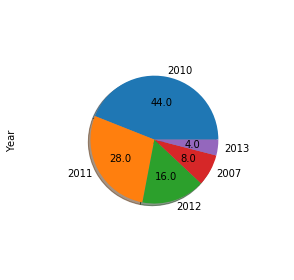

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import pie, axis, show


print("\n\n PakWheel Pie Chart")

pak_years=[]
pak_price=[]
reviews =pd.read_csv((made+model+'PakWheel.csv'))
pak_years=reviews['Year']
pak_price=reviews['Price']
reviews['Year'].value_counts().head(len(reviews)).plot.pie(radius=0.6,autopct='%0.1f',shadow=True)
# Unsquish the pie.
plt.gca().set_aspect('equal')
plt.tight_layout()
plt.savefig('PakWheel_Pie_Chart.png')




OLX Pie Chart


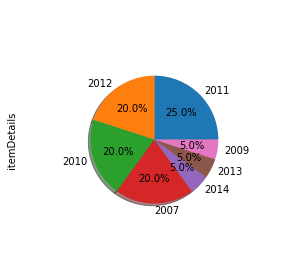

In [15]:

print("\n\nOLX Pie Chart")

reviews =pd.read_csv((made+model+'OLX.csv'))
reviews['itemDetails'].value_counts().head(len(reviews)).plot.pie(radius=0.6,autopct='%0.1f%%',shadow=True)
# Unsquish the pie.
plt.gca().set_aspect('equal')
plt.tight_layout()
plt.savefig('OLX_Pie_Chart.png')

In [16]:
def drawMyRuler(pdf):
    pdf.drawString(100,810, '')
    pdf.drawString(200,810, '')
    pdf.drawString(300,810, '')
    pdf.drawString(400,810, '')
    pdf.drawString(500,810, '')

    pdf.drawString(10,100, '')
    pdf.drawString(10,200, '')
    pdf.drawString(10,300, '')
    pdf.drawString(10,400, '')
    pdf.drawString(10,500, '')
    pdf.drawString(10,600, '')
    pdf.drawString(10,700, '')
    pdf.drawString(10,800, '')    








# ###################################
# Content
fileName = 'MyCarReport.pdf'
documentTitle = 'Document title!'
title = 'Car Reort'
subTitle = 'Report'

textLines = [
'You have searched the car'+made+model,
    'The data gathered about your searched'
    ' car is came ','from OLX.COM.PK and PAKWHEELS.',
    'The core information of the ads from these',
    'websites about your searched car is displyed',
    'according to your '+to+' and '+Tfrom+'',
    'Further the information about the car like its milage,',
    'transmission, price, year of registration will be given,',
    'to check this out you can esily access the .csv file ',
    'which is generated after gathering the data from these' 
    ' websites.'
]

image = 'PakWheel_Pie_Chart.png'
image2 = 'OLX_Pie_Chart.png'


# ###################################
# 0) Create document 
from reportlab.pdfgen import canvas 

pdf = canvas.Canvas(fileName)
pdf.setTitle(documentTitle)



drawMyRuler(pdf)
# ###################################
# 1) Title :: Set fonts 
# # Print available fonts
# for font in pdf.getAvailableFonts():
#     print(font)

# Register a new font
from reportlab.pdfbase.ttfonts import TTFont
from reportlab.pdfbase import pdfmetrics

pdfmetrics.registerFont(
    TTFont('abc', 'SakBunderan.ttf')
)
pdf.setFont('abc', 36)
pdf.drawCentredString(300, 770, title)









# ###################################
# 2) Sub Title 
# RGB - Red Green and Blue
pdf.setFillColorRGB(0, 0, 255)
pdf.setFont("Courier-Bold", 18)
pdf.drawCentredString(290,720, subTitle)






# ###################################
# 3) Draw a line
pdf.line(30, 710, 550, 710)









# ###################################
# 4) Text object :: for large amounts of text
from reportlab.lib import colors

text = pdf.beginText(40, 680)
text.setFont("Courier", 14)
text.setFillColor(colors.black)
for line in textLines:
    text.textLine(line)

pdf.drawText(text)





# ###################################
# 5) Draw a image
pdf.drawInlineImage(image, 100, 0)
pdf.drawInlineImage(image2, 100, 210)





pdf.save()